In [1]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
# California Housing Prices
dataset = fetch_california_housing(as_frame = True)

X = dataset['data']
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [3]:
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()

In [4]:
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [5]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)

In [6]:
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Exact explainer: 4129it [13:17,  5.12it/s]                          


In [7]:
shap_values.values

array([[ 4.58076590e-01,  1.47888859e-01, -9.32713281e-04, ...,
        -1.60339189e-03, -6.14394628e-02,  6.97844990e-01],
       [-6.89815828e-01, -4.40173812e-02, -1.01966795e-02, ...,
        -7.18424649e-03, -9.07541077e-01,  3.67016169e-01],
       [-4.38943732e-01, -7.56455900e-02,  3.14417579e-02, ...,
        -9.83333399e-03, -5.64997970e-01,  5.51818271e-02],
       ...,
       [-4.74337399e-01, -1.11265668e-02, -4.52858871e-02, ...,
        -3.62937634e-02,  6.21410369e-02, -6.83222222e-01],
       [-4.03263436e-01,  1.21756184e-02, -7.92733191e-02, ...,
        -5.96000041e-02, -5.87572326e-01,  1.68394984e-01],
       [ 1.08959580e+00, -8.28395863e-02,  6.32913938e-02, ...,
         2.10988391e-01, -5.28616347e-02,  3.37923948e-01]])

In [8]:
from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

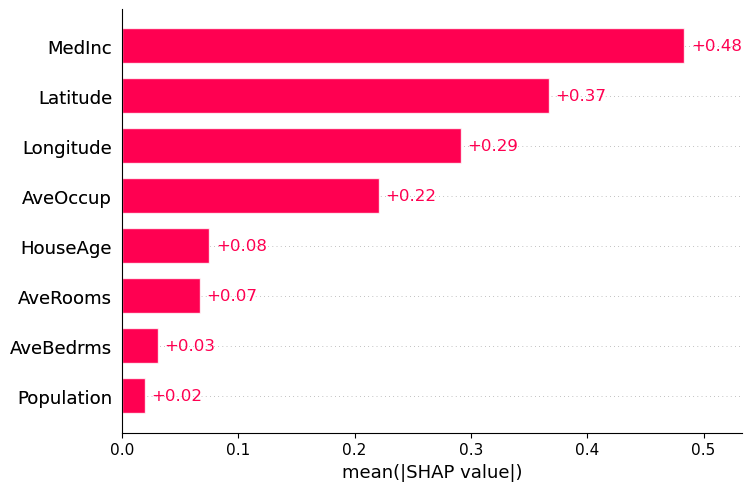

In [9]:
shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


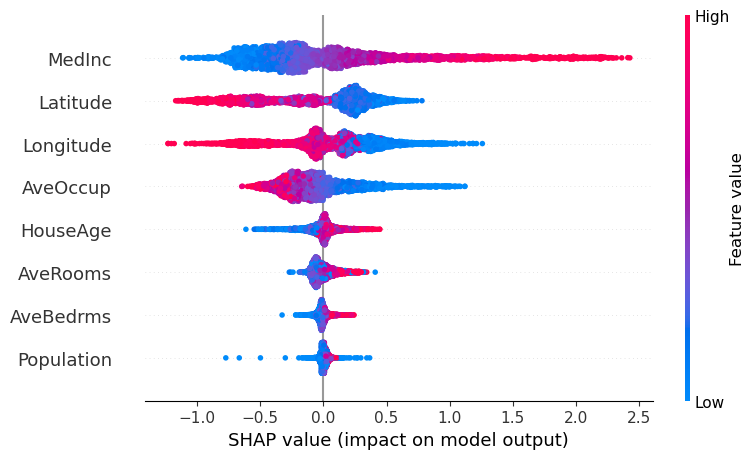

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


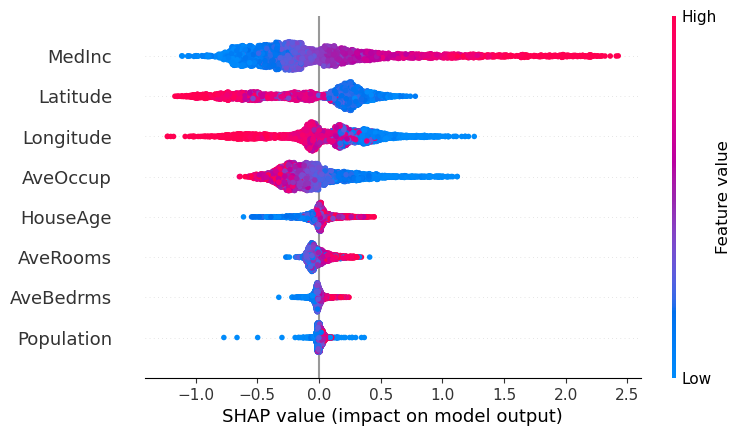

In [10]:
shap.summary_plot(shap_values)
# or 
shap.plots.beeswarm(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


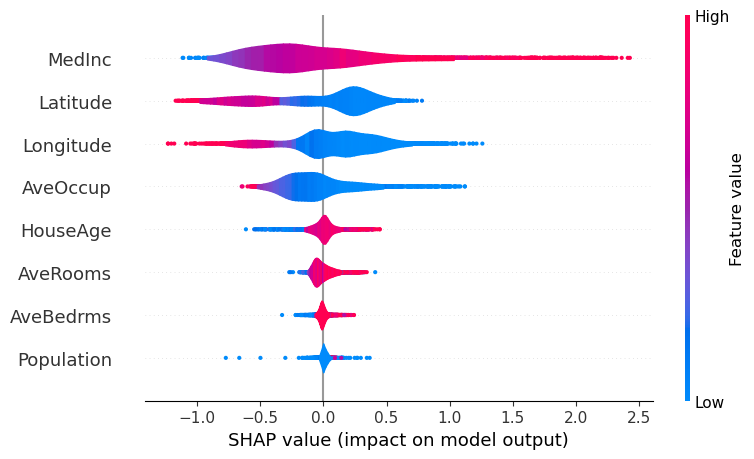

In [11]:
shap.summary_plot(shap_values, plot_type='violin')